# Correlation of Toilet Facilities with Dropout and Gross Enrollment Ratio respectively

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
toilet_data = pd.read_csv('../input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv')
dropout_data = pd.read_csv('../input/indian-school-education-statistics/dropout-ratio-2012-2015.csv')
ger_data = pd.read_csv('../input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv')

## Toilet Facilities Dataset

In [3]:
toilet_data.head(5)

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
3,Andhra Pradesh,2013-14,53.03,62.58,82.05,45.45,64.11,76.24,60.63,59.26,85.71,73.44,56.88
4,Andhra Pradesh,2014-15,57.91,76.51,96.00,75.00,93.33,91.43,77.99,80.65,60.00,86.54,65.34


In [4]:
toilet_data.isnull().sum()

State_UT                            0
year                                0
Primary_Only                        0
Primary_with_U_Primary              0
Primary_with_U_Primary_Sec_HrSec    0
U_Primary_Only                      0
U_Primary_With_Sec_HrSec            0
Primary_with_U_Primary_Sec          0
U_Primary_With_Sec                  0
Sec_Only                            0
Sec_with_HrSec.                     0
HrSec_Only                          0
All Schools                         0
dtype: int64

In [5]:
toilet_data['State_UT'].value_counts()

Puducherry                   3
Bihar                        3
Uttar Pradesh                3
Tamil Nadu                   3
Dadra & Nagar Haveli         3
Madhya Pradesh               3
All India                    3
West Bengal                  3
Gujarat                      3
Haryana                      3
Andhra Pradesh               3
Himachal Pradesh             3
Sikkim                       3
Nagaland                     3
Meghalaya                    3
Mizoram                      3
Chhattisgarh                 3
Delhi                        3
Odisha                       3
Jammu And Kashmir            3
Maharashtra                  3
Manipur                      3
Lakshadweep                  3
Tripura                      3
Karnataka                    3
Daman & Diu                  3
Uttarakhand                  3
Chandigarh                   3
Jharkhand                    3
Andaman & Nicobar Islands    3
Assam                        3
Punjab                       3
Kerala  

In [6]:
# Obtaining the key features and resetting index
toilet_data = toilet_data[['State_UT', 'Primary_Only', 'U_Primary_Only', 'Sec_Only', 'HrSec_Only', 'All Schools']].groupby('State_UT').mean().reset_index()

In [7]:
toilet_data.head()

,State_UT,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only,All Schools
0,All India,88.706667,90.753333,93.876667,86.333333,90.733333
1,Andaman & Nicobar Islands,97.193333,33.333333,0.000000,0.000000,98.173333
2,Andhra Pradesh,70.173333,73.483333,79.970000,86.660000,73.970000
3,Arunachal Pradesh,75.306667,66.666667,0.000000,33.333333,80.116667
4,Assam,67.300000,55.733333,40.393333,49.633333,65.923333


## Dropout Ratio Dataset

In [8]:
dropout_data.head(5)

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [9]:
# Replacing to unique state names
dropout_data['State_UT'] = dropout_data['State_UT'].str.replace('Madhya  Pradesh', 'Madhya Pradesh')
dropout_data['State_UT'] = dropout_data['State_UT'].str.replace('Tamil  Nadu', 'Tamil Nadu')
dropout_data['State_UT'] = dropout_data['State_UT'].str.replace('Arunachal  Pradesh', 'Arunachal Pradesh')

In [10]:
# Replacing strings as NAN values
dropout_data = dropout_data.replace('NR', np.nan)
dropout_data = dropout_data.replace('Uppe_r_Primary', np.nan)

In [11]:
# Obtaining key features
dropout = dropout_data[['State_UT', 'Primary_Total', 'Upper Primary_Total', 'Secondary _Total', 'HrSecondary_Total']]

In [12]:
# Replacing each dtype as float
dropout.Primary_Total = dropout.Primary_Total.astype(float, errors = 'raise')
dropout['Upper Primary_Total'] = dropout['Upper Primary_Total'].astype(float, errors = 'raise')
dropout['Secondary _Total'] = dropout['Secondary _Total'].astype(float, errors = 'raise')
dropout.HrSecondary_Total = dropout.HrSecondary_Total.astype(float, errors = 'raise')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [13]:
# Filling NAN values
dropout.fillna(method = 'bfill', inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [14]:
# Grouping and resetting index
dropout = dropout.groupby('State_UT').mean().reset_index()

In [15]:
dropout.head()

,State_UT,Primary_Total,Upper Primary_Total,Secondary _Total,HrSecondary_Total
0,A & N Islands,0.80,1.143333,7.543333,15.646667
1,All India,4.38,3.643333,16.486667,1.540000
2,Andhra Pradesh,4.75,4.113333,13.693333,9.736667
3,Arunachal Pradesh,12.29,6.590000,14.843333,13.533333
4,Assam,9.68,8.253333,28.086667,8.526667


## Gross Enrollment Dataset

In [16]:
ger_data.head(5)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7


In [17]:
# To check for strings in the column
if '@' in ger_data['Higher_Secondary_Total'].values:
        print ("string is there")
else:
    print('None')

string is there


In [18]:
# Replacing NR and @ strings as NAN values
ger_data = ger_data.replace('NR', np.nan)
ger_data = ger_data.replace('@', np.nan)

In [19]:
# Filling NAN values
ger_data.fillna(method = 'bfill', inplace = True)

In [20]:
ger_data['State_UT'].value_counts()

Bihar                        3
Maharashtra                  3
Delhi                        3
Uttar Pradesh                3
Tamil Nadu                   3
Dadra & Nagar Haveli         3
All India                    3
West Bengal                  3
Gujarat                      3
Haryana                      3
Andhra Pradesh               3
Himachal Pradesh             3
Sikkim                       3
Nagaland                     3
Meghalaya                    3
Mizoram                      3
Chhattisgarh                 3
Odisha                       3
Arunachal Pradesh            3
Goa                          3
Andaman & Nicobar Islands    3
Jammu And Kashmir            3
Manipur                      3
Lakshadweep                  3
Tripura                      3
Karnataka                    3
Daman & Diu                  3
Chandigarh                   3
Jharkhand                    3
Assam                        3
Punjab                       3
Kerala                       3
Rajastha

In [21]:
# Replacing to unique state names
ger_data['State_UT'] = ger_data['State_UT'].str.replace('Uttarakhand', 'Uttaranchal')
ger_data['State_UT'] = ger_data['State_UT'].str.replace('Puducherry', 'Pondicherry')
ger_data['State_UT'] = ger_data['State_UT'].str.replace('MADHYA PRADESH', 'Madhya Pradesh')

In [22]:
# Obtaining key features
ger = ger_data[['State_UT', 'Primary_Total', 'Upper_Primary_Total', 'Secondary_Total', 'Higher_Secondary_Total']]
ger

,State_UT,Primary_Total,Upper_Primary_Total,Secondary_Total,Higher_Secondary_Total
0,Andaman & Nicobar Islands,93.93,91.83,100.16,101.28
1,Andhra Pradesh,96.74,83.57,75.20,60.3
2,Arunachal Pradesh,128.46,113.94,86.65,65.27
3,Assam,113.43,93.13,71.21,32.94
4,Bihar,97.96,87.24,60.08,23.7
...,...,...,...,...,...
105,Tripura,109.98,120.54,120.57,43.4
106,Uttar Pradesh,95.00,74.54,67.79,63.75
107,Uttaranchal,100.54,85.53,90.35,80.36
108,West Bengal,102.33,103.17,78.17,49.95


In [23]:
# Replacing each dtype as float
ger.Primary_Total = ger.Primary_Total.astype(float, errors = 'raise')
ger['Upper_Primary_Total'] = ger['Upper_Primary_Total'].astype(float, errors = 'raise')
ger['Secondary_Total'] = ger['Secondary_Total'].astype(float, errors = 'raise')
ger.Higher_Secondary_Total = ger.Higher_Secondary_Total.astype(float, errors = 'raise')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [24]:
# Grouping
ger = ger.groupby('State_UT').mean().reset_index()

In [25]:
ger.head()

,State_UT,Primary_Total,Upper_Primary_Total,Secondary_Total,Higher_Secondary_Total
0,All India,100.216667,91.126667,78.386667,54.193333
1,Andaman & Nicobar Islands,91.260000,87.863333,93.243333,90.516667
2,Andhra Pradesh,89.810000,81.456667,74.370000,57.363333
3,Arunachal Pradesh,127.783333,122.200000,89.300000,65.263333
4,Assam,111.500000,94.013333,74.526667,35.240000


## Checking correlations

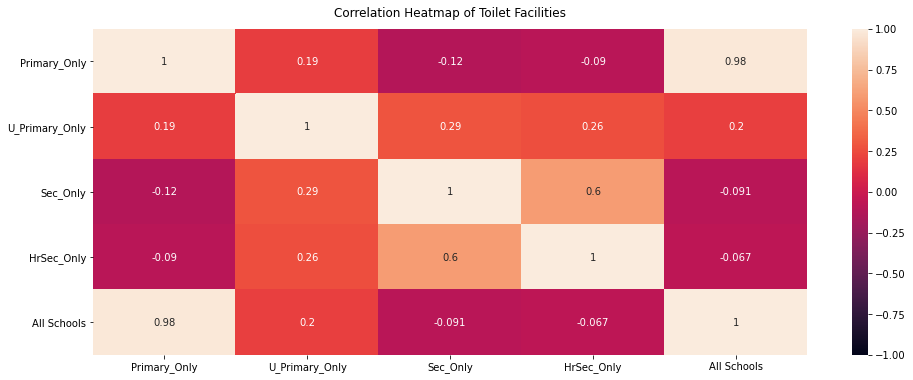

In [26]:
# Correlation of Toilet Facilities
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(toilet_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of Toilet Facilities', fontdict={'fontsize':12}, pad=12)
plt.savefig('dropout heatmap.png', dpi=300, bbox_inches='tight')

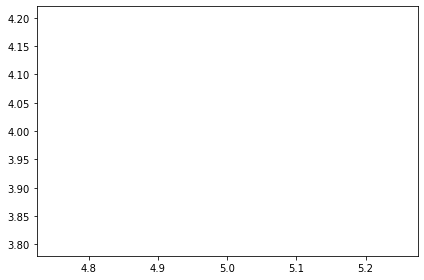

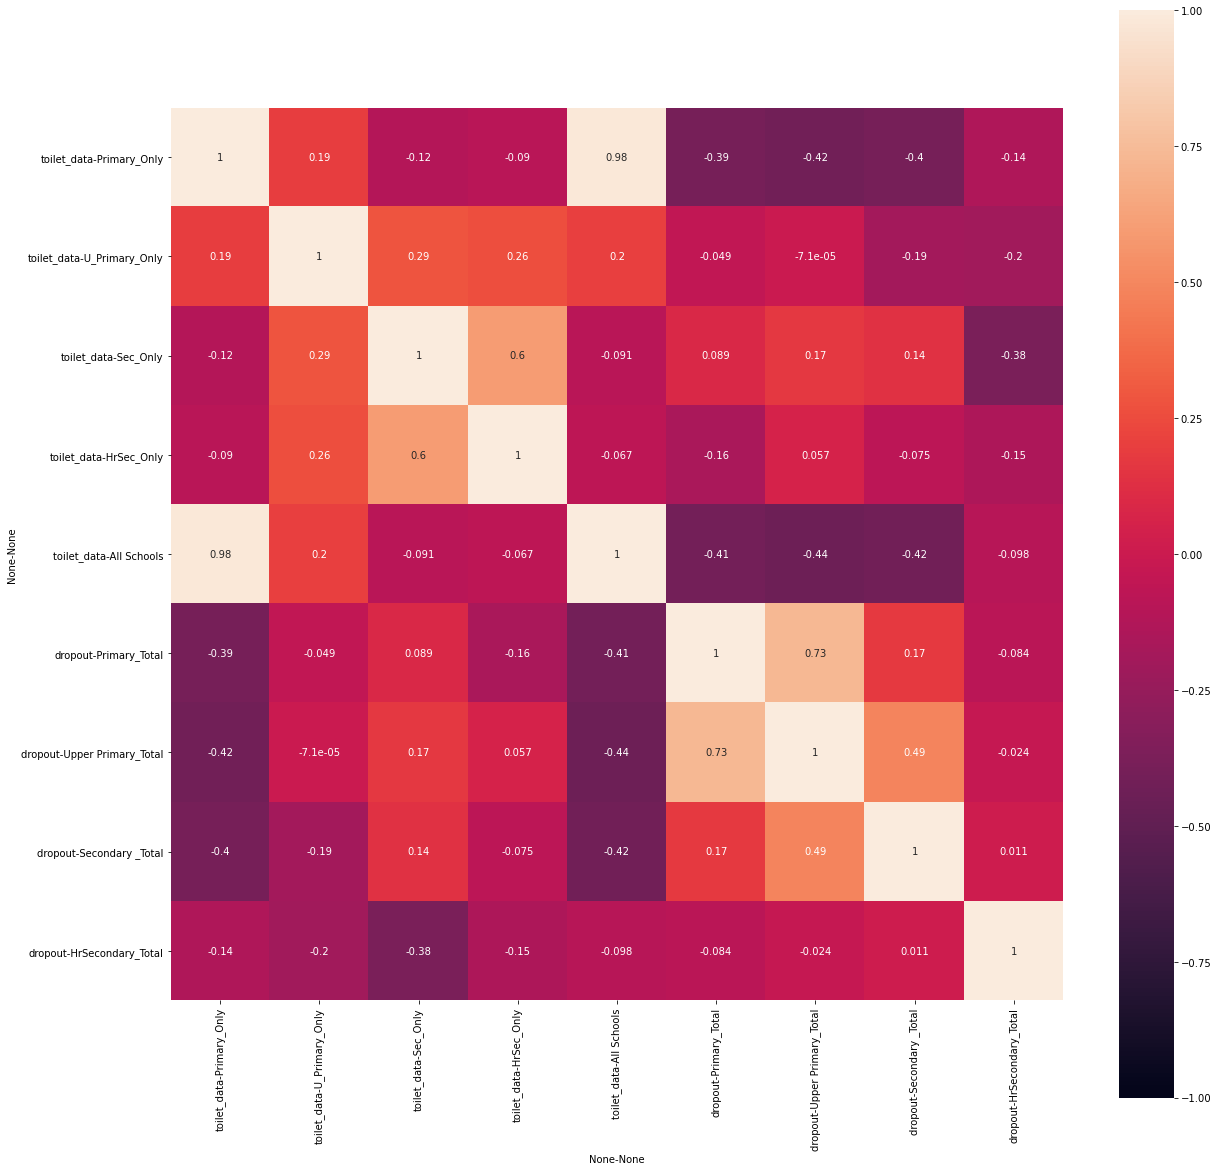

In [27]:
# Correlation of Toilet Facilities with Dropout Ratio
con = pd.concat([d.set_index('State_UT') for d in [toilet_data, dropout]], axis=1, keys=['toilet_data', 'dropout'])
corrmat = con.corr()
f, ax = plt.subplots()
plt.figure(figsize = (20, 20))
sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True, square = True)
sources = corrmat.columns.get_level_values(0)
for i, source in enumerate(sources):
    if i and source != sources[i - 1]:
        ax.axhline(len(sources) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

* This heatmap implies that the toilet facilities in the primary schools have an inverse relationship with the dropout ratio in the primary, upper primary and secondary schools (the higher the toilet facilities, the lower the dropout ratio).
* It also reveals that the toilet facilities in the upper primary schools have almost similar inverse relationship with the dropout ratio in the secondary and higher seconadry schools.
* It also shows that the toilet facilities in the secondary schools have a little direct relationship with the dropout ratio in primary schools (the higher the toilet facilities in the secondary schools, the higher the dropout ratio in the primary schools).
* Finally, it reveals that the total toilet facilities in all schools have an inverse relationship with the dropout ratio in the primary, upper primary and secondary schools.

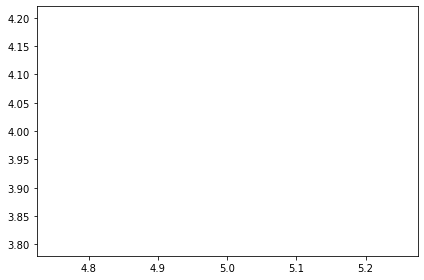

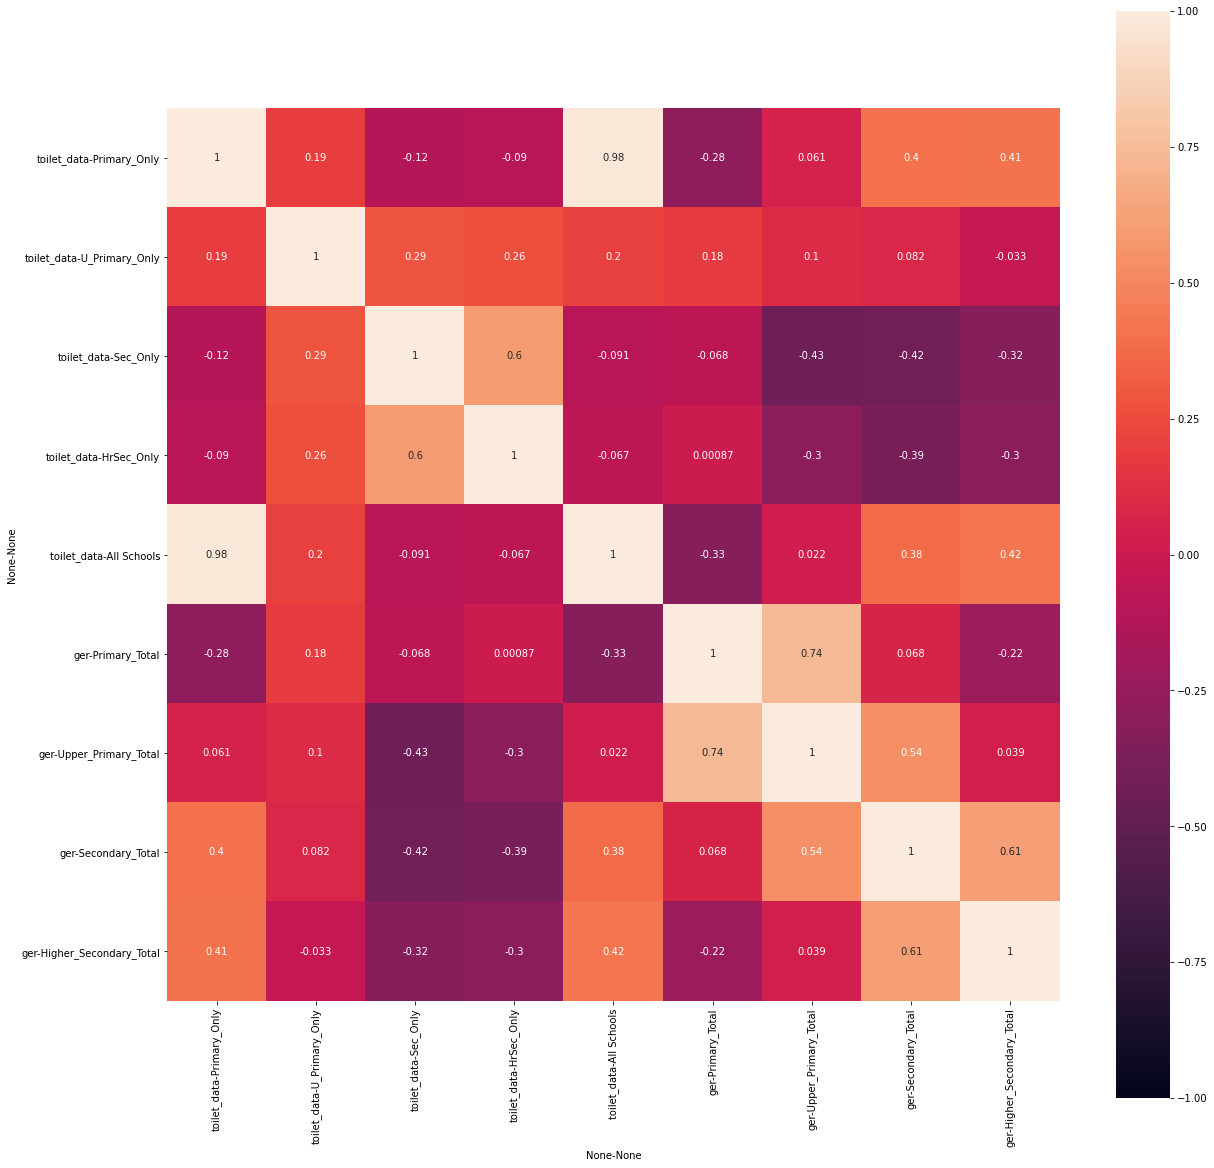

In [28]:
# Correlation of Toilet Facilities with Gross Enrollment Ratio
con = pd.concat([d.set_index('State_UT') for d in [toilet_data, ger]], axis=1, keys=['toilet_data', 'ger'])
corrmat = con.corr()
f, ax = plt.subplots()
plt.figure(figsize = (20, 20))
sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True, square = True)
sources = corrmat.columns.get_level_values(0)
for i, source in enumerate(sources):
    if i and source != sources[i - 1]:
        ax.axhline(len(sources) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

* This heatmap reveals that the toilet facilities in the primary schools have a direct relationship with the gross enrollment ratio in the secondary and higher secondary schoools while having an inverse relationship with the gross enrollment ratio in primary schools.
* It also implies that the toilet facilities in the secondary schools have an inverse relationship with the gross enrollment ratio in the upper primary, secondary and higher secondary schools (the higher the toilet facilities, the lower the gross enrollment ratio in the respective schools).
* It also shows that the toilet facilities in the higher secondary schools have an inverse relationship with the gross enrollment ratio in the upper primary, secondary and higher secondary schools.
* Finally, it reveals that the total toilet facilities in all schools have an inverse relationship with the gross enrollment ratio in the primary schools and direct relationship with the secondary and higher secondary schools.